# ***PyTorch***



In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

In [ ]:
print(torch.cuda.get_device_name())

Tesla T4


In [ ]:
import numpy as np

In [ ]:
#TENSOR AND SOME OPERATIONS
x = torch.rand(3,3)

In [ ]:
x.size()

torch.Size([3, 3])

In [ ]:
x

tensor([[0.3035, 0.7667, 0.5050],
        [0.0415, 0.9045, 0.0778],
        [0.0913, 0.8962, 0.0334]])

In [ ]:
print(f"Ones function will generate only one as a element \n \n {torch.ones(2,2)} \n \n Same for zeors \n \n {torch.zeros(2,2)}  \n \n .rand will generate random numbers with a given dimenssion \n \n {torch.rand(2,2)} \n \n , .arange will generate in a ceratin range with given steps \n \n {torch.arange(1,10 )} \n \n and , .tensor can be used to create a tensor by and list or arrays \n \n {torch.tensor([1,2,3,4,5,6,7])}" )

Ones function will generate only one as a element 
 
 tensor([[1., 1.],
        [1., 1.]]) 
 
 Same for zeors 
 
 tensor([[0., 0.],
        [0., 0.]])  
 
 .rand will generate random numbers with a given dimenssion 
 
 tensor([[0.6742, 0.3762],
        [0.4606, 0.0335]]) 
 
 , .arange will generate in a ceratin range with given steps 
 
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]) 
 
 and , .tensor can be used to create a tensor by and list or arrays 
 
 tensor([1, 2, 3, 4, 5, 6, 7])


In [ ]:
y = np.random.rand(3,3)

In [ ]:
y

array([[0.80143698, 0.07280508, 0.73898993],
       [0.12306541, 0.06445327, 0.63987317],
       [0.40235994, 0.48981652, 0.70747925]])

In [ ]:
#convert y to tensor
x = torch.from_numpy(y)
print(x)

tensor([[0.8014, 0.0728, 0.7390],
        [0.1231, 0.0645, 0.6399],
        [0.4024, 0.4898, 0.7075]], dtype=torch.float64)


In [ ]:
a = np.arange(10)

In [ ]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = torch.rand(1,10)

In [ ]:
b

tensor([[0.1354, 0.6506, 0.3886, 0.5585, 0.9173, 0.5654, 0.6666, 0.1433, 0.1222,
         0.9678]])

In [ ]:
#tensor slicing
print(b[0,:])

tensor([0.1354, 0.6506, 0.3886, 0.5585, 0.9173, 0.5654, 0.6666, 0.1433, 0.1222,
        0.9678])


In [ ]:
b[0,6].item()

0.6665869951248169

In [ ]:
#resizing a torch tensor

b = b.view(-1,2)

In [ ]:
#-1 for automatic selection
b

tensor([[0.1354, 0.6506],
        [0.3886, 0.5585],
        [0.9173, 0.5654],
        [0.6666, 0.1433],
        [0.1222, 0.9678]])

In [ ]:
#Conversion of tensor to np array and vice versa
a = np.arange(0,16).reshape(4,4)
b = torch.arange(0,10).view(2,5)

a = torch.from_numpy(a)  #now it is tensor
b = b.numpy()  #Now it is Numpy array

print(type(a))

print(type(b))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [ ]:
#if numpy array and tensor are in same cpu or gpu then all the data will be saved in same location if we convert it to another
a = np.zeros(3)
b = torch.from_numpy(a)
print(a.device)
print(b.device)

"""b.add_(2)
print(a)
print(b)
cpu
cpu
[2. 2. 2.]
tensor([2., 2., 2.], dtype=torch.float64)"""
#here we have only added 2 in tensor but as you can see in the output , it has also updated the values of numpy array also
#So for this we have to store in different different locations

b = torch.from_numpy(a).to("cuda")    #we can also use device attribute while declaring a tensor and .to is used to move from one device to another
print(b.device)
print(a.device)

b.add_(1)
print(a)
print(b)

"""cuda:0
cpu
[0. 0. 0.]
tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)"""

#and also we can not convert GPU tensors to numpy array so for that first we have to move it from gpu to cpu

cpu
cpu
cuda:0
cpu
[0. 0. 0.]
tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)


"cuda:0\ncpu\n[0. 0. 0.]\ntensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)"

In [ ]:
#requires_grad parameter
# used to help in finding the gradient of that tensor so we have to make it trure while intializing tensor
x = torch.tensor([1.,2.,3.,4.] , requires_grad= True)

In [ ]:
#Auto Gradient in torch

x = torch.randn(10 , requires_grad=True)
print(x)

tensor([-0.7917,  0.9544, -1.3850, -0.9299,  1.0775,  0.2821,  0.2183,  0.2462,
        -0.1998,  1.7824], requires_grad=True)


In [ ]:
y = x+2
print(y)
#we will get a grad_fn

tensor([1.2083, 2.9544, 0.6150, 1.0701, 3.0775, 2.2821, 2.2183, 2.2462, 1.8002,
        3.7824], grad_fn=<AddBackward0>)


In [ ]:
#we can calculate gradiend directly by using .backward function
# When y is not a scalar, you need to provide a gradient argument to y.backward()
# or convert y to a scalar before calling backward().
# Calculating the mean of y is a common way to get a scalar value
# so that you can compute the gradient of the mean with respect to the input tensor x.
# y_scalar.backward() computes the gradient of y_scalar (the mean of y) with respect to x.
y = y.mean()
y.backward()
print(x.grad)

#if y.mean is not given then we have to use y.backward(torch.ones_like(y , dtype = torch.float32))

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


In [ ]:
#we can also deactivate the gradient tracking by using
"""x.requires_grad_(False)
x.detach()
with torch.no_grad():"""

'x.requires_grad_(False)\nx.detach()\nwith torch.no_grad():'

In [ ]:
# y.grad has all the grad stored in tensor format but requires_grad must be true for that object


# ***BACKPROPAGATION***

In [ ]:
#for simple linera regression
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0 , requires_grad=True)

#forward Pass
y_pred = w * x
loss = (y_pred - y)**2

print(loss)
#tensor(1., grad_fn=<PowBackward0>)

#backward Pass
loss.backward()
print(w.grad)  #first gradient



#update weight by using optimizers and optimizer.step() function

##we wil do many such forward and backward pass until we get minimun loss


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# ***Gradient Descent Using AutoGrad***

In [ ]:
import numpy as np


In [ ]:
#linear regression y = w * x

x = torch.tensor([1,2,3,4] , dtype = torch.float32)
y = torch.tensor([2,4,6,8] , dtype = torch.float32)

In [ ]:
w = torch.tensor(0.0 , dtype = torch.float32 , requires_grad = True)


In [ ]:



#model prediction

def forward(x):
  return w * x

#loss MSE

def loss(y , y_pred):
  return ((y_pred - y)**2).mean()

"""#gradient
#MSE = 1 / N * (loss)
# dl / dw = 1/N 2x (w * x - y)
def gradient(x , y , y_pred):
  return np.dot(2*x , y_pred - y).mean()"""


print(f"Prediction Before Training : f(2) = {forward(2) : .3f}")

#training

learning_rate = 0.01
n_iter = 2

for epoch in range(n_iter):
  y_pred = forward(x)
  l = loss(y , y_pred)
  #gradient = backward()
  l.backward()
  grad = w.grad




  #update our weights
  with torch.no_grad():
    # Use in-place operation to update w
    w-= learning_rate * grad # Correct update

  #reinitialize grad tp zero
  grad.zero_()

  print(f"epoch {epoch + 1} , w = {w:.3f} , loss = {l:.8f}")

print(f"Prediction After Training : f(2) = {forward(100000000000000) : .3f}")

Prediction Before Training : f(2) =  0.000
epoch 1 , w = 0.300 , loss = 30.00000000
epoch 2 , w = 0.555 , loss = 21.67499924
Prediction After Training : f(2) =  55499995217920.000


# ***Loss & Optimizer Class in PyTorch***

In [ ]:
#Training Pipeline

# 1) Design model (input , output size , forward pass))
# 2) Construct loss and optimizer
# 3) Training lopp
#   - Forward pass : Prediction
#   - backward pass : gradient calaculation
#   - update weights

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:

#linear regression y = w * x

# Initialize input (x) and output (y) tensors
# Tensors are shaped as (batch_size, input_features) and (batch_size, output_features)
# to be compatible with PyTorch's nn.Linear module, which expects batched input.
# Here, batch_size = 4 and input/output_features = 1.
x = torch.tensor([[1],[2],[3],[4]] , dtype = torch.float32)
y = torch.tensor([[2],[4],[6],[8]] , dtype = torch.float32)
x_test = torch.tensor([5], dtype = torch.float32)
n_samples , n_features = x.shape
print(n_samples , n_features)
"""
here we do not need weights and forward to initialize because
pytorch itself handle this
w = torch.tensor(0.0 , dtype = torch.float32 , requires_grad = True)


#model prediction

def forward(x):
  return w * x"""
input_size , op_size = n_features , n_features
#model = nn.Linear(input_size , op_size)

# we can also design a model
class LinearReg(nn.Module):
  def __init__(self , input_dim  , output_dim):
    super(LinearReg , self).__init__()
    self.layer = nn.Linear(input_dim , output_dim)

  def forward(self , x):
    return self.layer(x)
model = LinearReg(input_size , op_size)
#loss MSE
loss = nn.MSELoss()
"""
def loss(y , y_pred):
  return ((y_pred - y)**2).mean()"""

"""#gradient
#MSE = 1 / N * (loss)
# dl / dw = 1/N 2x (w * x - y)
def gradient(x , y , y_pred):
  return np.dot(2*x , y_pred - y).mean()"""


print(f"Prediction Before Training : f(2) = {model(x_test).item() : .3f}")

#training

learning_rate = 0.01
n_iter = 10

#for automatic weights update
optimzer = optim.SGD(model.parameters() , lr=learning_rate)
for epoch in range(n_iter):
  y_pred = model(x)
  l = loss(y , y_pred)
  #gradient = backward()
  l.backward()

  #update wights
  optimzer.step()
  #reinitialize grad tp zero
  optimzer.zero_grad()


  [w , b] = model.parameters()
  print(f"epoch {epoch + 1} , w = {w.item():.3f} , b = {b.item():.3f} , loss = {l.item():.8f}")

print(f"Prediction After Training : f(5) = {model(x_test).item() : .3f}")

4 1
Prediction Before Training : f(2) = -4.534
epoch 1 , w = -0.390 , b = -0.219 , loss = 65.55545044
epoch 2 , w = -0.020 , b = -0.095 , loss = 45.50182343
epoch 3 , w = 0.287 , b = 0.008 , loss = 31.58695030
epoch 4 , w = 0.544 , b = 0.093 , loss = 21.93162537
epoch 5 , w = 0.758 , b = 0.164 , loss = 15.23191833
epoch 6 , w = 0.936 , b = 0.223 , loss = 10.58304787
epoch 7 , w = 1.084 , b = 0.272 , loss = 7.35721207
epoch 8 , w = 1.208 , b = 0.312 , loss = 5.11879063
epoch 9 , w = 1.311 , b = 0.345 , loss = 3.56551456
epoch 10 , w = 1.397 , b = 0.373 , loss = 2.48764658
Prediction After Training : f(5) =  7.359


# ***Linear Regression***

Epochs : 10 , loss : 3094.6184
Epochs : 20 , loss : 1632.5621
Epochs : 30 , loss : 1083.9036


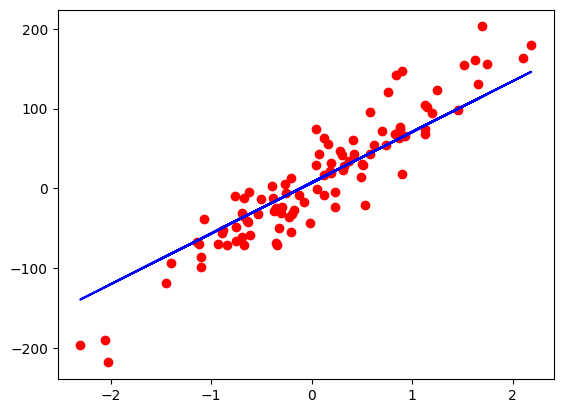

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.optim as optim
#Step 0 - Prepare data
x_numpy , y_numpy = datasets.make_regression(n_samples=100 , n_features=1 , noise=30 , random_state=1)

#convert it to tensor
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0] , 1)

n_samples , n_features = x.shape

#
#Step 1 - Model Design


class Linear(nn.Module):
  def __init__(self , input_dim , output_dim):
    super(Linear , self).__init__()
    self.layer = nn.Linear(input_dim , output_dim)

  def forward(self , x):
    return self.layer(x)
output_size = 1
model = Linear(n_features , output_size)



#Step 2 - Loss and Optimizer
loss = nn.MSELoss()
optimz = optim.SGD(model.parameters(), lr=0.03)


#Step 3 - Training
epochs = 30
for epoch in range(epochs):
  #FB
  y_pred = model(x)

  #loss
  loss_ = loss(y_pred , y)

  #BP
  loss_.backward()

  #update
  optimz.step()

  #making grad 0
  optimz.zero_grad()

  if (epoch+1)%10 == 0:
    print(f"Epochs : {epoch+1} , loss : {loss_.item():.4f}")

#plot
predicted = model(x).detach()   #detach grad calculation
plt.plot(x_numpy , y_numpy , 'ro')
plt.plot(x_numpy , predicted , 'b')
plt.show()

## ***Logistic Regression***

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt


#Step 0 - Prepare data
db = datasets.load_breast_cancer()
x_numpy , y_numpy = db.data , db.target

#train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_numpy , y_numpy , test_size=0.2 , random_state=1234)

#Sacle out Features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


#convert it to tensor
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0] , 1)
y_test = y_test.view(y_test.shape[0] , 1)

n_samples , n_features = x_train.shape


#Step 1 - Model Design

# Logistic Regression Model
class Log_Reg(nn.Module):
  def __init__(self , input_dim , output_dim):
    super(Log_Reg , self).__init__()
    # Logistic Regression is a linear layer followed by a sigmoid activation
    self.linear = nn.Linear(input_dim , output_dim)

  def forward(self , x):
    # Apply linear transformation and then sigmoid activation
    return torch.sigmoid(self.linear(x))

model = Log_Reg(n_features , 1)



#Step 2 - Loss and Optimizer
# BCELoss is used for binary classification with sigmoid output
loss = nn.BCELoss()
optimz = optim.SGD(model.parameters(), lr=0.01) # Reduced learning rate for stability


#Step 3 - Training
epochs = 1000 # Increased epochs for better convergence
for epoch in range(epochs):
  #FB
  y_pred = model(x_train)

  #loss
  loss_ = loss(y_pred , y_train)

  #BP
  loss_.backward()

  #update
  optimz.step()

  #making grad 0
  optimz.zero_grad()

  if (epoch+1)%100 == 0: # Print less frequently for many epochs
    print(f"Epochs : {epoch+1} , loss : {loss_.item():.4f}")


#Evaluation
with torch.no_grad():
  pred = model(x_test)
  pred = pred.round() # Round predictions to 0 or 1
  correct = (pred == y_test).sum().item() # Count correct predictions
  acc = correct / y_test.shape[0] # Calculate accuracy
  print(f"Accuracy : {acc:.4f}")


Epochs : 100 , loss : 0.2348
Epochs : 200 , loss : 0.1704
Epochs : 300 , loss : 0.1422
Epochs : 400 , loss : 0.1254
Epochs : 500 , loss : 0.1142
Epochs : 600 , loss : 0.1059
Epochs : 700 , loss : 0.0996
Epochs : 800 , loss : 0.0945
Epochs : 900 , loss : 0.0903
Epochs : 1000 , loss : 0.0868
Accuracy : 0.9386


# ***DataSet and DataLoader***

In [ ]:
"""
Understanding Training Concepts: Epoch, Batch, and Iteration

Epoch: One complete pass through the entire training dataset.
During one epoch, every training sample is used exactly once to update the model's weights.

Batch (or Mini-Batch): A small subset of the training data that is used in one iteration
to compute the gradient and update the model's weights. Using batches is more computationally
efficient than using the entire dataset at once (batch gradient descent) and provides a
more stable gradient estimate than using one sample at a time (stochastic gradient descent).

Iteration: One training step where a single batch of data is processed.
In each iteration:
1. A batch of data is fed forward through the model to get predictions.
2. The loss is calculated based on the predictions and the true labels for that batch.
3. The gradients of the loss with respect to the model's parameters are computed (backward pass).
4. The optimizer uses these gradients to update the model's parameters.

The number of iterations in one epoch is equal to `total_number_of_training_samples / batch_size`.
"""

"\nUnderstanding Training Concepts: Epoch, Batch, and Iteration\n\nEpoch: One complete pass through the entire training dataset.\nDuring one epoch, every training sample is used exactly once to update the model's weights.\n\nBatch (or Mini-Batch): A small subset of the training data that is used in one iteration\nto compute the gradient and update the model's weights. Using batches is more computationally\nefficient than using the entire dataset at once (batch gradient descent) and provides a\nmore stable gradient estimate than using one sample at a time (stochastic gradient descent).\n\nIteration: One training step where a single batch of data is processed.\nIn each iteration:\n1. A batch of data is fed forward through the model to get predictions.\n2. The loss is calculated based on the predictions and the true labels for that batch.\n3. The gradients of the loss with respect to the model's parameters are computed (backward pass).\n4. The optimizer uses these gradients to update the 

In [ ]:
!wget https://archive.ics.uci.edu/static/public/109/wine.zip

--2025-07-18 09:39:16--  https://archive.ics.uci.edu/static/public/109/wine.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.zip’

wine.zip                [ <=>                ]   5.90K  --.-KB/s    in 0s      

2025-07-18 09:39:17 (108 MB/s) - ‘wine.zip’ saved [6038]



In [ ]:
!unzip wine.zip

Archive:  wine.zip
  inflating: Index                   
  inflating: wine.data               
  inflating: wine.names              


In [ ]:
with open("/content/wine.names") as f:
  print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [ ]:
import pandas as pd
wine_attributes = [
    "Class", # Added the Class column
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
data = pd.read_csv("/content/wine.data" , header = None , sep = ',')
data.columns = wine_attributes # Uncommented to set column names
data = np.array(data) # Convert DataFrame to NumPy array immediately after loading

In [ ]:
# Removed the data.describe() line as data is now a NumPy array
# If you need descriptive statistics for the NumPy array, use NumPy functions like np.mean(), np.std(), etc.

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset , DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    # Assuming the first column is the Class (label) and the rest are features
    self.x = torch.from_numpy(data[:,1:]).type(torch.float32) # Ensure float32 type
    self.y = torch.from_numpy(data[:,[0]]).type(torch.long) # Ensure long type for classification label
    self.n_samples = data.shape[0]

  def __getitem__(self , index):
    #dataset[0]
    return self.x[index] , self.y[index]

  def __len__(self):
    #len(dataset)
    return self.n_samples

dataset = WineDataset()
# First data sample and its corresponding label
first_data, first_label = dataset[0]
print(f"First data sample: {first_data}, its label: {first_label}")


dataloader = DataLoader(dataset = dataset , batch_size = 4 , shuffle = True , num_workers = 2)

"""# Get one batch of data from the DataLoader using the built-in next() function
dataiter = iter(dataloader)
features , labels = next(dataiter) # Changed from dataiter.next() to next(dataiter)
print(f"One batch of features: {features.shape}, labels: {labels.shape}")
print(features , labels)"""

#Dummy Training Loop
num_epoch = 10
total_samples = len(dataset)
n_iter = math.ceil(total_samples / 4)
print(total_samples , n_iter)

for epoch in range(num_epoch):
  for i , (inputs , labels) in enumerate(dataloader):
    if (i+1)%5 == 0:
      print(f"epoch {epoch+1}/{num_epoch} , step {i+1}/{n_iter} , inputs {inputs.shape}")

First data sample: tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), its label: tensor([1])
178 45
epoch 1/10 , step 5/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 10/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 15/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 20/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 25/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 30/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 35/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 40/45 , inputs torch.Size([4, 13])
epoch 1/10 , step 45/45 , inputs torch.Size([2, 13])
epoch 2/10 , step 5/45 , inputs torch.Size([4, 13])
epoch 2/10 , step 10/45 , inputs torch.Size([4, 13])
epoch 2/10 , step 15/45 , inputs torch.Size([4, 13])
epoch 2/10 , step 20/45 , inputs torch.Size([4, 13])
epoch 2/10 , step 25/45 , inputs torch.Size([4, 13])
epoch 2/10 , step 30/45 , inp

# ***Data Transforms***

In [ ]:
import torch
import torchvision

In [ ]:
# PyTorch provides a variety of transforms to preprocess data for training.
# These transforms can be applied to the input data (features) and/or the target labels.

# Common Transforms for Images:
# - Resize: Resize the image to a specified size.
#   - Input: PIL Image, Tensor Image
#   - Output: PIL Image, Tensor Image
# - RandomCrop: Crop a random portion of the image.
#   - Input: PIL Image, Tensor Image
#   - Output: PIL Image, Tensor Image
# - CenterCrop: Crop the center portion of the image.
#   - Input: PIL Image, Tensor Image
#   - Output: PIL Image, Tensor Image
# - RandomHorizontalFlip: Randomly flip the image horizontally.
#   - Input: PIL Image, Tensor Image
#   - Output: PIL Image, Tensor Image
# - RandomVerticalFlip: Randomly flip the image vertically.
#   - Input: PIL Image, Tensor Image
#   - Output: PIL Image, Tensor Image
# - ToTensor: Convert a PIL Image or NumPy array to a PyTorch Tensor.
#   - Input: PIL Image, numpy.ndarray
#   - Output: torch.Tensor
# - Normalize: Normalize a tensor image with mean and standard deviation.
#   - Input: torch.Tensor
#   - Output: torch.Tensor
# - Compose: Compose multiple transforms together.
#   - Input: Varies depending on the first transform in the sequence
#   - Output: Varies depending on the last transform in the sequence

# Common Transforms for other data types (e.g., text, audio):
# - These transforms are often more dataset-specific and might involve:
# - Tokenization: Breaking down text into words or sub-word units.
#   - Input: String
#   - Output: List of strings or tokens
# - Numericalization: Converting tokens into numerical representations.
#   - Input: List of strings or tokens
#   - Output: List or Tensor of integers (indices)
# - Padding: Adding padding to sequences to make them of equal length.
#   - Input: List or Tensor
#   - Output: Tensor
# - Feature scaling: Standardizing or normalizing numerical features.
#   - Input: numpy.ndarray or torch.Tensor
#   - Output: numpy.ndarray or torch.Tensor

# Custom Transforms:
# - You can also create your own custom transforms by defining a class
#   that implements the __call__ method. This method takes the data as input
#   and returns the transformed data.
#   - Input: Varies depending on the custom transform
#   - Output: Varies depending on the custom transform

In [ ]:
class WineDataset(Dataset):
  def __init__(self , transform = None):
    # Assuming the first column is the Class (label) and the rest are features
    self.x = data[:,1:]
    self.y = data[:,[0]]  #only np arrays
    self.n_samples = data.shape[0]


    self.transform = transform

  def __getitem__(self , index):
    #dataset[0]
    samples =  self.x[index] , self.y[index]
    if self.transform:
      return self.transform(samples)
    return samples

  def __len__(self):
    #len(dataset)
    return self.n_samples

#Custom Transforms

class toTensor:
  def __call__(self , samples):
    input , target = samples
    return torch.from_numpy(input) , torch.from_numpy(target)

class addTransform:
  def __init__(self , number):
    self.number = number

  def __call__(self , samples):
    inputs , target = samples
    inputs += self.number
    return inputs , target


#for calling multiple transform we will use
#torchvision.transform.Composed([list of transforms])
composed = torchvision.transforms.Compose([toTensor() , addTransform(5)])
dataset = WineDataset(transform = composed)
first_data , first_label = dataset[0]
print(first_data , first_label)


tensor([  19.2300,    6.7100,    7.4300,   20.6000,  132.0000,    7.8000,
           8.0600,    5.2800,    7.2900,   10.6400,    6.0400,    8.9200,
        1070.0000], dtype=torch.float64) tensor([1.], dtype=torch.float64)


# ***SoftMax and CrossEntropy loss***

In [ ]:
#Softmax activation
#S(x) = e^x / summation of e^x --- Give multiple probabilities

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x) , axis = 0)

x = np.array([2.0 , 1.0 , 0.1])
outputs = softmax(x)
print(f"Softmax Outputs : {outputs}")

x = torch.tensor([2.0 , 1.0 , 0.1])
outputs = torch.softmax(x , dim = 0)
print(f"Softmax Outputs : {outputs}")

Softmax Outputs : [0.65900114 0.24243297 0.09856589]
Softmax Outputs : tensor([0.6590, 0.2424, 0.0986])


In [ ]:
#Cross Entropy Loss
# D(y_pred , y) = -1/N sum(y . log(y_pred))

def cross_entropy(predicted , actual):
  loss = -np.sum(actual * np.log(predicted))
  return loss #/  [predicted.shape[0]]

y = np.array([1 , 0 , 0])  #one hot encoded



y_pred_good = np.array([0.7 , 0.2 , 0.1])
y_pred_bad = np.array([0.1 , 0.3 , 0.6])
l1 = cross_entropy(y_pred_good , y)
l2 = cross_entropy(y_pred_bad , y)
print(f"Loss 1 : {l1:.4f}")
print(f"Loss 2 : {l2:.4f}")



#In tensor
#when we us this function we are required to not to use any softmax at last layer
#and also we do not need to give in one ot encoded format

loss = nn.CrossEntropyLoss()
y = torch.tensor([0]) #only class 0
#we can also do for multiple samples
y_ = torch.tensor([0 , 1 , 2])
#n_sample x n_classes = 3x1
y_pred_good = torch.tensor([[2.0 , 1.0 , 0.1]])
y_pred_bad = torch.tensor([[0.1 , 1.0 , 2.0]])
y_pred_good_ = torch.tensor([[2.0 , 1.0 , 0.1] , [0 , 5 , 0] , [0 , 0 , 10]])
y_pred_bad_ = torch.tensor([[0.1 , 0.2 , 0.7] , [10 , 0 , 0] , [0 , 10 , 0]])


l1 = loss(y_pred_good , y)
l2 = loss(y_pred_bad , y)
print(f"Loss 1 : {l1.item()}")
print(f"Loss 2 : {l2.item()}")

l3 = loss(y_pred_good_ , y_)
l4 = loss(y_pred_bad_ , y_)
print(f"Loss 3 : {l3.item()}")
print(f"Loss 4 : {l4.item()}")

_ ,prediction1 = torch.max(y_pred_good , 1)

_ ,prediction12 = torch.max(y_pred_bad , 1)

_ , prediction2 = torch.max(y_pred_good_ , 1)

_ , prediction3 = torch.max(y_pred_bad_ , 1)

print(prediction1)
print(prediction12)

print(prediction2)
print(prediction3)

Loss 1 : 0.3567
Loss 2 : 2.3026
Loss 1 : 0.4170299470424652
Loss 2 : 2.3170299530029297
Loss 3 : 0.14350222051143646
Loss 4 : 7.12270975112915
tensor([0])
tensor([2])
tensor([0, 1, 2])
tensor([2, 0, 1])


# ***Activation Functions***

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#option 1 (create nn module)
class NeuralNet(nn.Module):
  def __init__(self , input_size , hidden_size):
    super(NeuralNet , self).__init__()
    self.linear1 = nn.Linear(input_size , hidden_size)
    self.relu = nn.ReLU()
    self.linear2 =nn.Linear(hidden_size , 1)
    """nn.Sigmoid()
    nn.Tanh()
    nn.LeakyReLU()
"""
  def forward(self , x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #sigmoid at the end
    y_pred = torch.sigmoid(out)
    return y_pred

#option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
  def __init__(self , input_size , hidden_size):
    super(NeuralNet , self).__init__()
    self.linear1 = nn.Linear(input_size , hidden_size)
    self.linear2 =nn.Linear(hidden_size , 1)
    """
    torch.relu()
    torch.tanh"""

  def forward(self , x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))
    return out

# ***Feed Forward Neural network***

In [ ]:
#MNIST Dataset
#DalaLoader and Transformation
#Multilayer neural net , activation function
#loss and optimzers
#training loop (batch training)
#model evaluation
#gpu support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

#hyperParameters

input_size = 784  #28x28
hidden_size = 100
num_class = 10
epochs = 2
batch_size = 100
lr = 0.001

#MNIST

dataset = torchvision.datasets.MNIST(root = './data' , train = True ,
                                    transform = transforms.ToTensor() , download = True
                                    )
test_data = torchvision.datasets.MNIST(root = './data' , train = False ,
                                    transform = transforms.ToTensor() , download = False
                                    )
train_loader = torch.utils.data.DataLoader(dataset = dataset , batch_size = batch_size , shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data , batch_size = batch_size , shuffle = True)

examples = iter(train_loader)
samples , labels = next(examples)
print(samples.shape , labels.shape)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.87MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 241kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.29MB/s]

torch.Size([100, 1, 28, 28]) torch.Size([100])


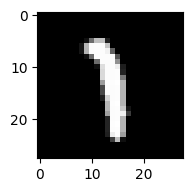

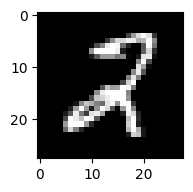

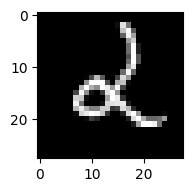

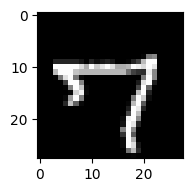

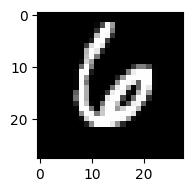

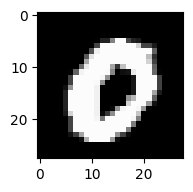

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0] , cmap = 'gray')
  plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self , input_size , hidden_size , num_class):
    super(NeuralNet , self).__init__()
    self.l1 = nn.Linear(input_size , hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size , num_class)

  def forward(self , x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
model = NeuralNet(input_size , hidden_size , num_class).to(device)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters() , lr = lr)

#training loop
n_total_steps = len(train_loader)
for epoch in range(epochs):
  for i , (image , labels) in enumerate(train_loader):
    #100,1,28,28
    #needing - 100 , 784
    image = image.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #FP
    output = model(image)
    loss = criterion(output , labels)

    #BP
    optim.zero_grad()
    loss.backward()
    optim.step()

    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


#testing and evaluation
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images , labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    output = model(images)
    _, predict = torch.max(output , 1)
    n_samples += labels.shape[0]
    n_correct += (predict == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy = {acc}')

Epoch [1/2], Step [100/600], Loss: 0.5023
Epoch [1/2], Step [200/600], Loss: 0.3962
Epoch [1/2], Step [300/600], Loss: 0.3046
Epoch [1/2], Step [400/600], Loss: 0.1791
Epoch [1/2], Step [500/600], Loss: 0.3375
Epoch [1/2], Step [600/600], Loss: 0.2199
Epoch [2/2], Step [100/600], Loss: 0.2059
Epoch [2/2], Step [200/600], Loss: 0.2132
Epoch [2/2], Step [300/600], Loss: 0.2431
Epoch [2/2], Step [400/600], Loss: 0.1335
Epoch [2/2], Step [500/600], Loss: 0.1321
Epoch [2/2], Step [600/600], Loss: 0.2631
Accuracy = 95.37


# ***Convolutional Neural Network (CNN)***

In [ ]:
# Convolutional Neural Networks (CNNs)

# What is a CNN?
# A Convolutional Neural Network (CNN) is a type of artificial neural network specifically designed
# for processing structured grid data, such as images, where patterns are spatially related.
# They are highly effective in tasks like image classification, object detection, and image segmentation.

# Key Components of a CNN:
# 1. Convolutional Layer: This layer applies convolutional filters (kernels) to the input data
#    to detect features like edges, corners, and textures. Each filter slides over the input,
#    performing element-wise multiplications and summing the results to create a feature map.
#    Multiple filters are typically used to extract various features.

# 2. Activation Function: Applied after the convolutional layer (or sometimes other layers)
#    to introduce non-linearity into the model. Common activation functions include ReLU (Rectified Linear Unit),
#    Sigmoid, and Tanh. ReLU is widely used due to its simplicity and effectiveness in preventing vanishing gradients.

# 3. Pooling Layer (or Downsampling Layer): This layer reduces the spatial dimensions (width and height)
#    of the feature maps, which helps to decrease the computational cost, reduce overfitting, and
#    make the network more robust to small variations in the input. Common pooling methods are
#    Max Pooling and Average Pooling.

# 4. Fully Connected Layer (Dense Layer): After several convolutional and pooling layers, the
#    flattened feature maps are connected to one or more fully connected layers. These layers
#    perform high-level reasoning based on the features extracted by the previous layers.

# 5. Output Layer: The final fully connected layer, which outputs the prediction. For classification
#    tasks, this layer often uses a Softmax activation function to output class probabilities.

# How CNNs work in PyTorch:

# PyTorch provides the `torch.nn` module to build neural networks, including CNNs.

# Convolutional Layers:
# - `torch.nn.Conv2d`: Used for 2D convolutions, typically for images.
#   - Parameters include `in_channels` (number of input channels, e.g., 3 for RGB images),
#     `out_channels` (number of output channels/filters), `kernel_size` (size of the convolutional filter),
#     `stride` (step size of the filter), and `padding` (padding added to the input).

# Activation Functions:
# - `torch.nn.ReLU()`, `torch.nn.Sigmoid()`, `torch.nn.Tanh()`, etc.
# - These can be added as separate layers or used directly as functions (`F.relu()`, `F.sigmoid()`, etc.)
#   from `torch.nn.functional`.

# Pooling Layers:
# - `torch.nn.MaxPool2d()`: Used for 2D max pooling.
#   - Parameters include `kernel_size` and `stride`.
# - `torch.nn.AvgPool2d()`: Used for 2D average pooling.

# Fully Connected Layers:
# - `torch.nn.Linear()`: Used for linear transformations (the core of fully connected layers).
#   - Parameters include `in_features` and `out_features`.

# Building a CNN in PyTorch:
# - You typically define a class that inherits from `torch.nn.Module`.
# - In the `__init__` method, you define the layers (Conv2d, ReLU, MaxPool2d, Linear, etc.).
# - In the `forward` method, you define the forward pass, specifying how data flows through the layers.
#   You apply the layers and activation functions in the desired order.
#   Remember to flatten the output of the convolutional/pooling layers before feeding it into the fully connected layers (often using `.view()` or `.flatten()`).

# Example structure in PyTorch:
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc = nn.Linear(16 * ...) # Calculate the correct input size based on pooling
#         self.output = nn.Linear(..., num_classes)

#     def forward(self, x):
#         out = self.conv1(x)
#         out = self.relu(out)
#         out = self.pool(out)
#         # Flatten the output for the fully connected layer
#         out = out.view(out.size(0), -1)
#         out = self.fc(out)
#         out = self.output(out) # Apply softmax if needed for multi-class classification
#         return out

# Loss Function and Optimizer:
# - Similar to other neural networks, you choose an appropriate loss function
#   (e.g., `nn.CrossEntropyLoss` for multi-class classification) and an optimizer
#   (e.g., `optim.Adam`, `optim.SGD`) to train the CNN.

# Training Loop:
# - The training loop involves iterating through the data in batches, performing
#   the forward pass, calculating the loss, performing the backward pass
#   (gradient calculation), and updating the weights using the optimizer.

In [ ]:
#CIFAR - 10 dataset
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#device config
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

#hyperParameters

epochs = 20
batch_size = 4
lr = 0.001

#CIFAR - 10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = torchvision.datasets.CIFAR10(root = './data' , train = True ,
                                    transform = transform , download = True
                                    )
test_data = torchvision.datasets.CIFAR10(root = './data' , train = False ,
                                    transform = transform , download = False
                                    )
train_loader = torch.utils.data.DataLoader(dataset = dataset , batch_size = batch_size , shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data , batch_size = batch_size , shuffle = True)

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


In [ ]:
classes = ('plane' , 'car' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck')

# Define a simple Convolutional Neural Network
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet , self).__init__()
    # First convolutional layer: 3 input channels (RGB), 6 output channels, 5x5 kernel
    self.l1 = nn.Conv2d(3 , 6 , 5)
    # Max pooling layer: 2x2 window, stride of 2
    self.pool = nn.MaxPool2d(2 , 2)
    # Second convolutional layer: 6 input channels (from previous layer), 16 output channels, 5x5 kernel
    self.l2 = nn.Conv2d(6 , 16 , 5)
    # First fully connected layer: 16*5*5 input features (flattened output from conv/pool), 120 output features
    self.fc1 = nn.Linear(16*5*5 , 120)
    # Second fully connected layer: 120 input features, 84 output features
    self.fc2 = nn.Linear(120 , 84)
    # Output fully connected layer: 84 input features, 10 output features (number of classes)
    self.fc3 = nn.Linear(84 , 10)

  def forward(self , x):
    x = self.pool(F.relu(self.l1(x)))
    x = self.pool(F.relu(self.l2(x)))
    x = x.view(-1 , 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = ConvNet().to(device)


In [ ]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters() , lr = lr)

#training loop
n_total_steps = len(train_loader)
for epoch in range(epochs):
  for i , (image , labels) in enumerate(train_loader):

    image = image.to(device)
    labels = labels.to(device)

    #FP
    output = model(image)
    loss = criterion(output , labels)

    #BP
    optim.zero_grad()
    loss.backward()
    optim.step()

    if (i+1) % 10000 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


#testing and evaluation
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images , labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = model(images)
    _, predict = torch.max(output , 1)
    n_samples += labels.shape[0]
    n_correct += (predict == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predict[i]
      n_class_correct[label] = n_class_correct[label]+1 if (label == pred) else n_class_correct[label]
      n_class_samples[label] = n_class_samples[label]+1

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy = {acc}')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]} : {acc}')


Epoch [1/20], Step [10000/12500], Loss: 1.9317
Epoch [2/20], Step [10000/12500], Loss: 1.3138
Epoch [3/20], Step [10000/12500], Loss: 0.9152
Epoch [4/20], Step [10000/12500], Loss: 0.8227
Epoch [5/20], Step [10000/12500], Loss: 1.1025
Epoch [6/20], Step [10000/12500], Loss: 1.4542
Epoch [7/20], Step [10000/12500], Loss: 1.1655
Epoch [8/20], Step [10000/12500], Loss: 0.9894
Epoch [9/20], Step [10000/12500], Loss: 0.4498
Epoch [10/20], Step [10000/12500], Loss: 1.0457
Epoch [11/20], Step [10000/12500], Loss: 0.3506
Epoch [12/20], Step [10000/12500], Loss: 0.4363
Epoch [13/20], Step [10000/12500], Loss: 1.3679
Epoch [14/20], Step [10000/12500], Loss: 0.4172
Epoch [15/20], Step [10000/12500], Loss: 1.2105
Epoch [16/20], Step [10000/12500], Loss: 1.0806
Epoch [17/20], Step [10000/12500], Loss: 0.9577
Epoch [18/20], Step [10000/12500], Loss: 0.5992
Epoch [19/20], Step [10000/12500], Loss: 0.2295
Epoch [20/20], Step [10000/12500], Loss: 1.3925
Accuracy = 61.78
Accuracy of plane : 71.0
Accurac

# ***Transfer Learning***

In [ ]:
# Transfer Learning: Reusing a pre-trained model on a new task.
# Instead of training a deep learning model from scratch on a new dataset,
# which requires a large amount of data and computational resources,
# transfer learning leverages a model that has already been trained on a
# similar, large dataset (e.g., ImageNet).
# The idea is that the pre-trained model has already learned to extract
# useful features (like edges, textures, shapes) from the data.
# These learned features can then be transferred and adapted to the new task.
# This is particularly useful when the new dataset is small, as it prevents
# overfitting and speeds up training.
# Common approaches include:
# 1. Feature Extraction: Using the pre-trained model as a fixed feature extractor
#    and training a new classifier on top of the extracted features.
# 2. Fine-tuning: Unfreezing some or all layers of the pre-trained model
#    and training them along with the new classifier on the new dataset,
#    usually with a smaller learning rate.

In [2]:
#We will use PreTrainined ResNet image Classifier which
#is trained on millions od data

#Image Folder
#Schedulers
#transfer Learning


#Download the Car and Bike dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshsaxenadn/car-vs-bike-classification-dataset")

print("Path to dataset files:", path)
import os
path = (os.path.join(path , "Car-Bike-Dataset"))

100%|██████████| 103M/103M [00:00<00:00, 150MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset/versions/1


In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.optim import lr_scheduler
from torchvision import datasets, models , transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
mean = np.array([0.485 , 0.456 , 0.406])
std = np.array([0.229 , 0.224 , 0.225])
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize(mean , std) , transforms.RandomHorizontalFlip() , transforms.RandomVerticalFlip() , transforms.RandomRotation(90) , transforms.RandomResizedCrop(224)])

dataset = datasets.ImageFolder(path, transform=transform )
train , val = torch.utils.data.random_split(dataset , [int(0.8*len(dataset)) , len(dataset)-int(0.8*len(dataset))])

print(f" training Size : {len(train)} , Validation Size : {len(val)}")
print(f"Classes in Dataset : {dataset.classes} ")
train_dataloader = torch.utils.data.DataLoader(train , batch_size = 20 , shuffle = True , num_workers = 4)
val_dataloader = torch.utils.data.DataLoader(val, batch_size = 20, shuffle = True , num_workers = 4)

 training Size : 3200 , Validation Size : 800
Classes in Dataset : ['Bike', 'Car'] 


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [5]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train' , 'val']:
            model.train() if phase == 'train' else model.eval()
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0 # Keep track of total samples processed in the phase

            dataloader = train_dataloader if phase == 'train' else val_dataloader
            dataset_size = len(train) if phase == 'train' else len(val) # Use correct dataset size for averaging

            for inputs , labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs , 1)
                    loss = criterion(outputs , labels)

                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0) # Accumulate total samples

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_size # Calculate loss over the entire phase
            epoch_acc = running_corrects.double() / dataset_size # Calculate accuracy over the entire phase

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)

    return model

In [6]:
#Fine Tunning
model = models.resnet18(pretrained = True)
for param in model.parameters():
  param.requires_grad = False  #freezing all layers
num_features = model.fc.in_features
model.fc = nn.Linear(num_features , 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters() , lr = 0.001 , momentum = 0.9)


#scheduler  -- update learning rate
step_lr_scheduler = lr_scheduler.StepLR(optimizer , step_size = 7 , gamma = 0.1)

model = train_model(model , criterion , optimizer , step_lr_scheduler , num_epochs = 5).to(device)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


Epoch 0/4
----------


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.3783 Acc: 0.8306
val Loss: 0.2508 Acc: 0.9025

Epoch 1/4
----------


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.2775 Acc: 0.8872
val Loss: 0.2297 Acc: 0.9075

Epoch 2/4
----------


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.2939 Acc: 0.8697
val Loss: 0.1923 Acc: 0.9213

Epoch 3/4
----------


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.2527 Acc: 0.8909
val Loss: 0.2247 Acc: 0.8950

Epoch 4/4
----------


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.2818 Acc: 0.8712
val Loss: 0.2176 Acc: 0.9062

Training complete in 6m 18s
Best val Acc: 0.921250
